In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv("transformed data 600 500 50/engine_runs_table_final.csv")

In [3]:
df.head(10)

,Unnamed: 0,index,Date (MM/DD/YYYY),File,Gtype,Flight Time,Start Time,End Time,Landing,Start_Alt (ft MSL),...,max_noise_MOP,max_noise_RPM,Engine_Run_Start_Times,time_difference,Engine_Event_LessThan_5min_into_flight,Height_Gain_Indicator,All_Gain_For_Flight_Ind,Height_Loss_Indicator,All_Loss_For_Flight_Ind,Blue_Line_Speed_Success_Ind
0,0,13,08/18/2020,2020-08-18-CNI-20Y-01.IGC,ASW 27-18 E (ASG-29E),3:37:01,16:44:59,202200,HOME,652,...,NaN,NaN,16:57:04,00:12:05,0,1,1,0,0,1
1,1,15,06/27/2024,46RGJUM1.IGC,VENTUS 3F,3:42:29,19:37:03,231932,HOME,3713,...,NaN,NaN,19:37:03,00:00:00,1,1,1,0,0,1
2,2,24,06/29/2018,2018-06-29-NKL-10Q-01.IGC,ASW 27-18 E (ASG-29E),3:18:46,18:38:35,215721,HOME,301,...,NaN,NaN,18:47:38,00:09:03,0,1,1,0,0,1
3,3,25,06/09/2018,2018-06-09-CNI-20E-01.IGC,ASW 27-18 E (ASG-29E),2:39:52,19:31:32,221124,HOME,1578,...,NaN,NaN,20:26:16,00:54:44,0,1,1,0,0,1
4,4,25,06/09/2018,2018-06-09-CNI-20E-01.IGC,ASW 27-18 E (ASG-29E),2:39:52,19:31:32,221124,HOME,1578,...,NaN,NaN,20:30:56,00:59:24,0,1,1,0,0,1
5,5,28,06/04/2023,2023-06-04-LXV-NBR-01.IGC,VENTUS 3F,4:13:53,17:07:46,212139,HOME,301,...,609.0,NaN,17:17:56,00:10:10,0,0,0,1,1,1
6,6,32,08/18/2018,2018-08-18-CNI-232-01.IGC,ASH 31 MI,5:14:00,18:03:40,231740,HOME,938,...,NaN,NaN,18:03:40,00:00:00,1,1,1,0,0,1
7,7,32,08/18/2018,2018-08-18-CNI-232-01.IGC,ASH 31 MI,5:14:00,18:03:40,231740,HOME,938,...,NaN,NaN,22:34:20,04:30:40,0,1,1,0,0,1
8,8,43,03/14/2020,03EGIQO1.IGC,SZD-56-3 DIANA-2 FES,4:07:39,17:03:31,211110,HOME,144,...,NaN,NaN,21:08:05,04:04:34,0,1,1,0,0,1
9,9,48,08/04/2024,2024-08-04-CNI-29F-01.IGC,AS 33ES,3:33:16,16:48:35,202151,HOME,1712,...,NaN,NaN,16:58:47,00:10:12,0,1,1,0,0,1


In [4]:
df = df[df['Engine_Event_LessThan_5min_into_flight'] == 0]

In [5]:
df.head(5)

,Unnamed: 0,index,Date (MM/DD/YYYY),File,Gtype,Flight Time,Start Time,End Time,Landing,Start_Alt (ft MSL),...,max_noise_MOP,max_noise_RPM,Engine_Run_Start_Times,time_difference,Engine_Event_LessThan_5min_into_flight,Height_Gain_Indicator,All_Gain_For_Flight_Ind,Height_Loss_Indicator,All_Loss_For_Flight_Ind,Blue_Line_Speed_Success_Ind
0,0,13,08/18/2020,2020-08-18-CNI-20Y-01.IGC,ASW 27-18 E (ASG-29E),3:37:01,16:44:59,202200,HOME,652,...,NaN,NaN,16:57:04,00:12:05,0,1,1,0,0,1
2,2,24,06/29/2018,2018-06-29-NKL-10Q-01.IGC,ASW 27-18 E (ASG-29E),3:18:46,18:38:35,215721,HOME,301,...,NaN,NaN,18:47:38,00:09:03,0,1,1,0,0,1
3,3,25,06/09/2018,2018-06-09-CNI-20E-01.IGC,ASW 27-18 E (ASG-29E),2:39:52,19:31:32,221124,HOME,1578,...,NaN,NaN,20:26:16,00:54:44,0,1,1,0,0,1
4,4,25,06/09/2018,2018-06-09-CNI-20E-01.IGC,ASW 27-18 E (ASG-29E),2:39:52,19:31:32,221124,HOME,1578,...,NaN,NaN,20:30:56,00:59:24,0,1,1,0,0,1
5,5,28,06/04/2023,2023-06-04-LXV-NBR-01.IGC,VENTUS 3F,4:13:53,17:07:46,212139,HOME,301,...,609.0,NaN,17:17:56,00:10:10,0,0,0,1,1,1


In [6]:
df.columns

Index(['Unnamed: 0', 'index', 'Date (MM/DD/YYYY)', 'File', 'Gtype',
       'Flight Time', 'Start Time', 'End Time', 'Landing',
       'Start_Alt (ft MSL)', 'Max Altitude (ft MSL/ft AGL)',
       'Surface Height (ft MSL)', 'Pressure Altitude (ft MSL)', 'Offset (ft)',
       'Sensor Info', 'ENL_Engine_Run_Start_Times',
       'MOP_Engine_Run_Start_Times', 'RPM_Engine_Run_Start_Times',
       'ENL_Engine_Run_Altitudes_MSL', 'MOP_Engine_Run_Altitudes_MSL',
       'RPM_Engine_Run_Altitudes_MSL', 'ENL_Engine_Run_Altitudes_AGL',
       'MOP_Engine_Run_Altitudes_AGL', 'RPM_Engine_Run_Altitudes_AGL',
       'ENL_Noise_Registration_Times', 'MOP_Noise_Registration_Times',
       'RPM_Noise_Registration_Times', 'ENL_Noise_Registration_Altitudes_AGL',
       'MOP_Noise_Registration_Altitudes_AGL',
       'RPM_Noise_Registration_Altitudes_AGL', 'first_event_time',
       'event_type', 'event_sensor', 'first_event_datetime',
       'flight_start_datetime', 'window_start', 'window_end',
       'engine

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 804 entries, 0 to 981
Data columns (total 70 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               804 non-null    int64  
 1   index                                    804 non-null    int64  
 2   Date (MM/DD/YYYY)                        804 non-null    object 
 3   File                                     804 non-null    object 
 4   Gtype                                    804 non-null    object 
 5   Flight Time                              804 non-null    object 
 6   Start Time                               804 non-null    object 
 7   End Time                                 804 non-null    int64  
 8   Landing                                  804 non-null    object 
 9   Start_Alt (ft MSL)                       804 non-null    int64  
 10  Max Altitude (ft MSL/ft AGL)             804 non-null  

In [8]:
df_reduced = df[[
    'Start_Alt (ft MSL)',
    'Surface Height (ft MSL)',
    'Pressure Altitude (ft MSL)',
    'Offset (ft)',
    'engine_run_agls',
    'altitude_rate_pre_event_window (ft/s)',
    'distance_traveled_during_window (miles)',
    'engine_run_times (s)',
    'height_gain_loss (ft)',
    'avg_speed_while_engine_running (knots)',
    'min_speed_while_engine_running (knots)',
    'max_speed_while_engine_running (knots)',
    'All_Min_TAS_knots',
    'All_Max_TAS_knots',
    'All_Avg_TAS_knots',
    'All_Post_Run_Min_TAS_knots',
    'All_Post_Run_Max_TAS_knots',
    'All_Post_Run_Avg_TAS_knots',
    'Min_Speed_While_Engine_Running_knots',
    'Max_Speed_While_Engine_Running_knots',
    'Avg_Speed_While_Engine_Running_knots',
    'max_noise_ENL',
    'max_noise_MOP',
    'max_noise_RPM']]

In [21]:
df_reduced.head(5)

,Start_Alt (ft MSL),Surface Height (ft MSL),Pressure Altitude (ft MSL),Offset (ft),engine_run_agls,altitude_rate_pre_event_window (ft/s),distance_traveled_during_window (miles),engine_run_times (s),height_gain_loss (ft),avg_speed_while_engine_running (knots),...,All_Avg_TAS_knots,All_Post_Run_Min_TAS_knots,All_Post_Run_Max_TAS_knots,All_Post_Run_Avg_TAS_knots,Min_Speed_While_Engine_Running_knots,Max_Speed_While_Engine_Running_knots,Avg_Speed_While_Engine_Running_knots,max_noise_ENL,max_noise_MOP,max_noise_RPM
0,652,199,215,16,656.0,-0.936667,5.448886,180,1368,NaN,...,69.3,45.4,81.7,65.1,NaN,NaN,NaN,999.0,NaN,NaN
2,301,92,78,-14,1335.0,-0.786667,5.752252,60,233,NaN,...,58.6,45.8,70.0,57.5,NaN,NaN,NaN,999.0,NaN,NaN
3,1578,481,488,7,830.0,-0.693333,4.463128,120,941,NaN,...,57.6,45.6,71.6,59.1,NaN,NaN,NaN,999.0,NaN,NaN
4,1578,481,488,7,1306.0,0.266667,5.358018,240,555,NaN,...,62.6,45.0,73.8,60.6,NaN,NaN,NaN,999.0,NaN,NaN
5,301,92,105,13,3737.0,1.403333,6.031295,60,-132,73.52,...,57.0,46.9,94.9,80.7,63.16,83.13,73.52,NaN,609.0,NaN


In [22]:
corr_matrix = df_reduced.corr(method='spearman',numeric_only=True)
corr_matrix

,Start_Alt (ft MSL),Surface Height (ft MSL),Pressure Altitude (ft MSL),Offset (ft),engine_run_agls,altitude_rate_pre_event_window (ft/s),distance_traveled_during_window (miles),engine_run_times (s),height_gain_loss (ft),avg_speed_while_engine_running (knots),...,All_Avg_TAS_knots,All_Post_Run_Min_TAS_knots,All_Post_Run_Max_TAS_knots,All_Post_Run_Avg_TAS_knots,Min_Speed_While_Engine_Running_knots,Max_Speed_While_Engine_Running_knots,Avg_Speed_While_Engine_Running_knots,max_noise_ENL,max_noise_MOP,max_noise_RPM
Start_Alt (ft MSL),1.000000,1.000000,0.948465,0.397922,-0.096214,-0.012049,0.074360,0.215922,0.231810,0.175184,...,-0.003102,-0.062341,0.249228,0.158933,0.233877,0.046458,0.148420,0.102162,0.630179,0.000000
Surface Height (ft MSL),1.000000,1.000000,0.948465,0.397922,-0.096214,-0.012049,0.074360,0.215922,0.231810,0.175184,...,-0.003102,-0.062341,0.249228,0.158933,0.233877,0.046458,0.148420,0.102162,0.630179,0.000000
Pressure Altitude (ft MSL),0.948465,0.948465,1.000000,0.566896,-0.093073,-0.017234,0.069394,0.223738,0.244454,0.145030,...,-0.003165,-0.086980,0.236394,0.141732,0.207175,0.058069,0.118365,0.100194,0.659209,0.045348
Offset (ft),0.397922,0.397922,0.566896,1.000000,0.023129,0.014382,-0.007751,0.118057,0.120453,-0.089449,...,-0.010286,-0.061516,0.112031,0.067210,0.037258,-0.083922,-0.112449,-0.037228,0.073245,-0.255455
engine_run_agls,-0.096214,-0.096214,-0.093073,0.023129,1.000000,0.499488,0.312455,-0.513304,-0.637731,0.076677,...,0.252752,0.303918,0.063241,0.122355,0.258124,-0.000612,0.077476,-0.418500,0.308639,0.539203
altitude_rate_pre_event_window (ft/s),-0.012049,-0.012049,-0.017234,0.014382,0.499488,1.000000,-0.220694,-0.305915,-0.356772,-0.089559,...,0.087514,0.149625,-0.005536,0.016996,0.101923,-0.164466,-0.107509,-0.258450,-0.333664,-0.527473
distance_traveled_during_window (miles),0.074360,0.074360,0.069394,-0.007751,0.312455,-0.220694,1.000000,-0.180657,-0.258170,0.189138,...,0.265722,0.281197,0.253073,0.295693,0.198270,0.091487,0.186246,-0.171826,0.621449,0.368132
engine_run_times (s),0.215922,0.215922,0.223738,0.118057,-0.513304,-0.305915,-0.180657,1.000000,0.623501,0.085894,...,-0.107296,-0.106878,0.125266,0.092424,-0.266061,0.172543,0.051501,0.458710,0.203793,0.443229
height_gain_loss (ft),0.231810,0.231810,0.244454,0.120453,-0.637731,-0.356772,-0.258170,0.623501,1.000000,0.183744,...,-0.275672,-0.186344,0.106556,0.063952,-0.155417,0.271796,0.180116,0.392873,0.154319,0.450549
avg_speed_while_engine_running (knots),0.175184,0.175184,0.145030,-0.089449,0.076677,-0.089559,0.189138,0.085894,0.183744,1.000000,...,0.112958,0.261981,0.205629,0.207987,0.402462,0.750492,1.000000,-0.001198,0.285160,0.521978


### Looking at the speed when engine started vs post engine run

In [11]:
df_reduced_2 = df[[
    'All_Min_TAS_knots',
    'All_Max_TAS_knots',
    'All_Avg_TAS_knots',
    'All_Post_Run_Min_TAS_knots',
    'All_Post_Run_Max_TAS_knots',
    'All_Post_Run_Avg_TAS_knots',
    'Min_Speed_While_Engine_Running_knots',
    'Max_Speed_While_Engine_Running_knots',
    'Avg_Speed_While_Engine_Running_knots']]

In [12]:
corr_matrix = df_reduced_2.corr(method='spearman',numeric_only=True)
corr_matrix

,All_Min_TAS_knots,All_Max_TAS_knots,All_Avg_TAS_knots,All_Post_Run_Min_TAS_knots,All_Post_Run_Max_TAS_knots,All_Post_Run_Avg_TAS_knots,Min_Speed_While_Engine_Running_knots,Max_Speed_While_Engine_Running_knots,Avg_Speed_While_Engine_Running_knots
All_Min_TAS_knots,1.000000,0.305140,0.711957,0.544280,0.118202,0.307585,0.253054,-0.045648,0.122744
All_Max_TAS_knots,0.305140,1.000000,0.787502,0.160167,0.491515,0.472860,0.165196,0.177732,0.138065
All_Avg_TAS_knots,0.711957,0.787502,1.000000,0.378280,0.373702,0.463476,0.195966,0.040830,0.112958
All_Post_Run_Min_TAS_knots,0.544280,0.160167,0.378280,1.000000,0.203137,0.495999,0.046846,0.217582,0.261981
All_Post_Run_Max_TAS_knots,0.118202,0.491515,0.373702,0.203137,1.000000,0.811102,0.132442,0.219174,0.205629
All_Post_Run_Avg_TAS_knots,0.307585,0.472860,0.463476,0.495999,0.811102,1.000000,0.067071,0.217445,0.207987
Min_Speed_While_Engine_Running_knots,0.253054,0.165196,0.195966,0.046846,0.132442,0.067071,1.000000,0.159457,0.402462
Max_Speed_While_Engine_Running_knots,-0.045648,0.177732,0.040830,0.217582,0.219174,0.217445,0.159457,1.000000,0.750492
Avg_Speed_While_Engine_Running_knots,0.122744,0.138065,0.112958,0.261981,0.205629,0.207987,0.402462,0.750492,1.000000


In [13]:
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)

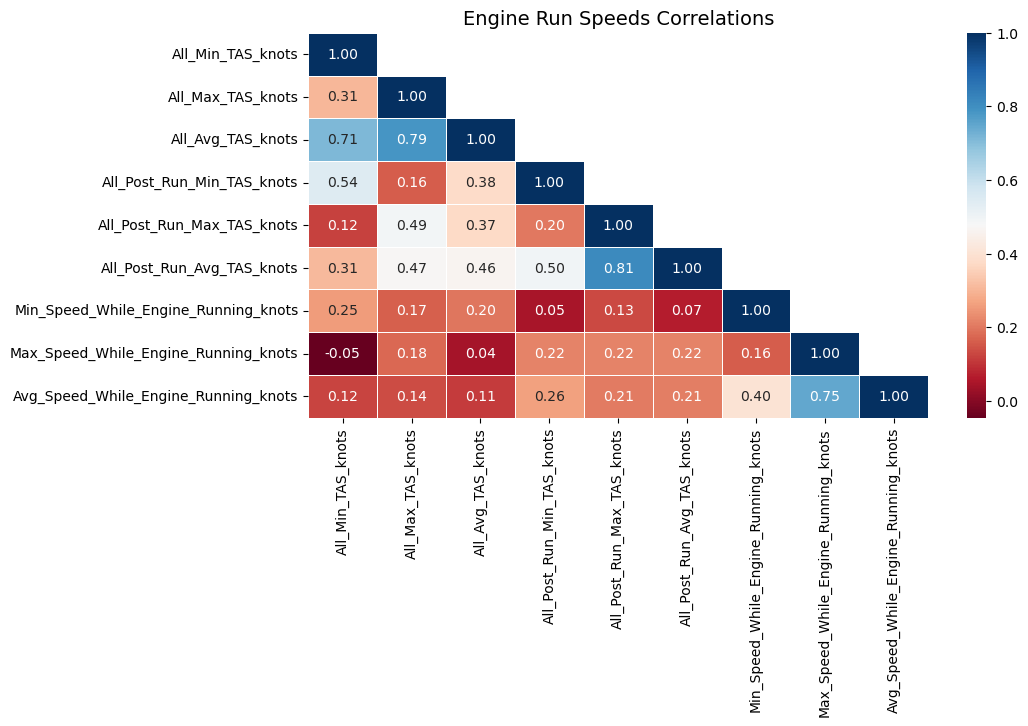

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title("Engine Run Speeds Correlations", fontsize=14)

# Generate the heatmap including the mask
heatmap = sns.heatmap(corr_matrix,
                      annot=True,
                      annot_kws={"fontsize": 10},
                      fmt='.2f',
                      linewidths=0.5,
                      cmap='RdBu',
                      mask=mask, # the mask has been included here
                      ax=ax)

# Display our plot
plt.show()

### We do not see any strong correlations between when speed when engine started vs after engine ran

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 804 entries, 0 to 981
Data columns (total 70 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               804 non-null    int64  
 1   index                                    804 non-null    int64  
 2   Date (MM/DD/YYYY)                        804 non-null    object 
 3   File                                     804 non-null    object 
 4   Gtype                                    804 non-null    object 
 5   Flight Time                              804 non-null    object 
 6   Start Time                               804 non-null    object 
 7   End Time                                 804 non-null    int64  
 8   Landing                                  804 non-null    object 
 9   Start_Alt (ft MSL)                       804 non-null    int64  
 10  Max Altitude (ft MSL/ft AGL)             804 non-null  

In [22]:
df.head(10)

,Unnamed: 0,index,Date (MM/DD/YYYY),File,Gtype,Flight Time,Start Time,End Time,Landing,Start_Alt (ft MSL),...,max_noise_MOP,max_noise_RPM,Engine_Run_Start_Times,time_difference,Engine_Event_LessThan_5min_into_flight,Height_Gain_Indicator,All_Gain_For_Flight_Ind,Height_Loss_Indicator,All_Loss_For_Flight_Ind,Blue_Line_Speed_Success_Ind
0,0,13,08/18/2020,2020-08-18-CNI-20Y-01.IGC,ASW 27-18 E (ASG-29E),3:37:01,16:44:59,202200,HOME,652,...,NaN,NaN,16:57:04,00:12:05,0,1,1,0,0,1
2,2,24,06/29/2018,2018-06-29-NKL-10Q-01.IGC,ASW 27-18 E (ASG-29E),3:18:46,18:38:35,215721,HOME,301,...,NaN,NaN,18:47:38,00:09:03,0,1,1,0,0,1
3,3,25,06/09/2018,2018-06-09-CNI-20E-01.IGC,ASW 27-18 E (ASG-29E),2:39:52,19:31:32,221124,HOME,1578,...,NaN,NaN,20:26:16,00:54:44,0,1,1,0,0,1
4,4,25,06/09/2018,2018-06-09-CNI-20E-01.IGC,ASW 27-18 E (ASG-29E),2:39:52,19:31:32,221124,HOME,1578,...,NaN,NaN,20:30:56,00:59:24,0,1,1,0,0,1
5,5,28,06/04/2023,2023-06-04-LXV-NBR-01.IGC,VENTUS 3F,4:13:53,17:07:46,212139,HOME,301,...,609.0,NaN,17:17:56,00:10:10,0,0,0,1,1,1
7,7,32,08/18/2018,2018-08-18-CNI-232-01.IGC,ASH 31 MI,5:14:00,18:03:40,231740,HOME,938,...,NaN,NaN,22:34:20,04:30:40,0,1,1,0,0,1
8,8,43,03/14/2020,03EGIQO1.IGC,SZD-56-3 DIANA-2 FES,4:07:39,17:03:31,211110,HOME,144,...,NaN,NaN,21:08:05,04:04:34,0,1,1,0,0,1
9,9,48,08/04/2024,2024-08-04-CNI-29F-01.IGC,AS 33ES,3:33:16,16:48:35,202151,HOME,1712,...,NaN,NaN,16:58:47,00:10:12,0,1,1,0,0,1
10,10,50,05/22/2014,2014-05-22-NKL-10R-01.IGC,DISCUS-2CT,2:06:56,17:45:39,195235,HOME,803,...,NaN,NaN,19:29:35,01:43:56,0,1,1,0,0,0
12,12,59,05/26/2016,2016-05-26-CNI-21L-01.IGC,VENTUS 2CT,2:02:48,17:36:24,193912,HOME,803,...,NaN,NaN,19:31:24,01:55:00,0,1,1,0,0,1


## What variables appear significantly different when comparing if engine started above vs below 1000 ft?

In [23]:
group1 = df[df['Engine_Start_Above_1000ft']==0]
group2 = df[df['Engine_Start_Above_1000ft']==1]

In [47]:
group1['Engine_Start_Above_1000ft'].head(5)

0     False
3     False
7     False
8     False
12    False
Name: Engine_Start_Above_1000ft, dtype: bool

In [48]:
group2['Engine_Start_Above_1000ft'].head(5)

2     True
4     True
5     True
9     True
10    True
Name: Engine_Start_Above_1000ft, dtype: bool

In [33]:
cols = ['Start_Alt (ft MSL)',
    'Surface Height (ft MSL)',
    'Pressure Altitude (ft MSL)',
    'Offset (ft)',
    'engine_run_agls',
    'altitude_rate_pre_event_window (ft/s)',
    'distance_traveled_during_window (miles)',
    'engine_run_times (s)',
    'height_gain_loss (ft)',
    'avg_speed_while_engine_running (knots)',
    'min_speed_while_engine_running (knots)',
    'max_speed_while_engine_running (knots)',
    'All_Min_TAS_knots',
    'All_Max_TAS_knots',
    'All_Avg_TAS_knots',
    'All_Post_Run_Min_TAS_knots',
    'All_Post_Run_Max_TAS_knots',
    'All_Post_Run_Avg_TAS_knots',
    'Min_Speed_While_Engine_Running_knots',
    'Max_Speed_While_Engine_Running_knots',
    'Avg_Speed_While_Engine_Running_knots',
    'max_noise_ENL',
    'max_noise_MOP',
    'max_noise_RPM']

### Set equal variances to false as we cannot assume equal variance between the 2 groups

In [54]:
out = pd.DataFrame(ttest_ind(group1[cols], group2[cols],equal_var=False),
                   columns=cols, index=['statistic', 'pvalue'])

In [55]:
pd.options.display.max_columns = None
display(out)

,Start_Alt (ft MSL),Surface Height (ft MSL),Pressure Altitude (ft MSL),Offset (ft),engine_run_agls,altitude_rate_pre_event_window (ft/s),distance_traveled_during_window (miles),engine_run_times (s),height_gain_loss (ft),avg_speed_while_engine_running (knots),min_speed_while_engine_running (knots),max_speed_while_engine_running (knots),All_Min_TAS_knots,All_Max_TAS_knots,All_Avg_TAS_knots,All_Post_Run_Min_TAS_knots,All_Post_Run_Max_TAS_knots,All_Post_Run_Avg_TAS_knots,Min_Speed_While_Engine_Running_knots,Max_Speed_While_Engine_Running_knots,Avg_Speed_While_Engine_Running_knots,max_noise_ENL,max_noise_MOP,max_noise_RPM
statistic,-1.347079,-1.346902,-0.655237,0.786000,-3.546365e+01,-1.314720e+01,-7.222657e+00,4.904579,1.510134e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pvalue,0.178422,0.178479,0.512554,0.432262,4.422760e-149,7.355109e-36,1.820436e-12,0.000001,1.193518e-41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Frequency')

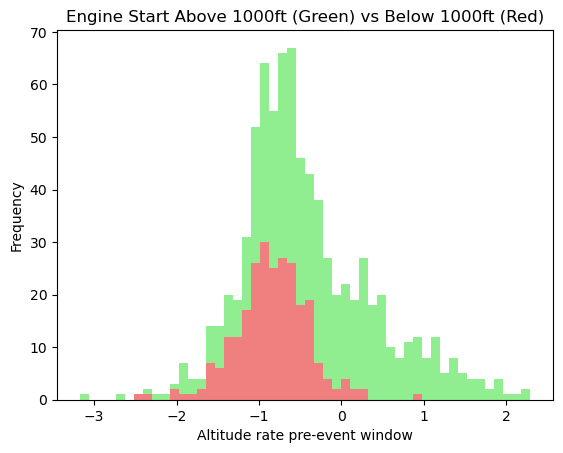

In [52]:
plt.hist([group1['altitude_rate_pre_event_window (ft/s)'],group2['altitude_rate_pre_event_window (ft/s)']],
          bins=50, stacked=True, color = ['lightcoral','lightgreen'])

# Add title and labels
plt.title('Engine Start Above 1000ft (Green) vs Below 1000ft (Red)')
plt.xlabel('Altitude rate pre-event window')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

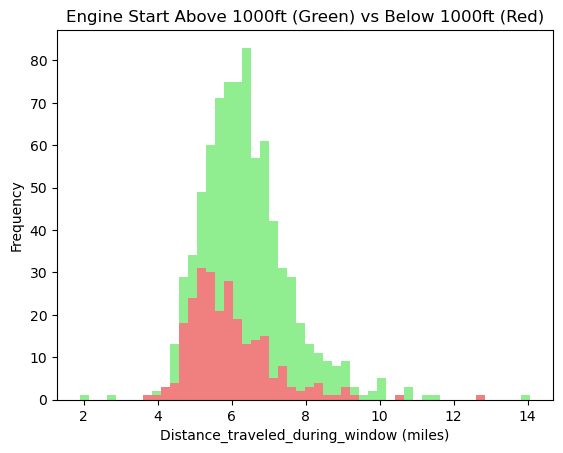

In [53]:
plt.hist([group1['distance_traveled_during_window (miles)'],group2['distance_traveled_during_window (miles)']],
          bins=50, stacked=True, color = ['lightcoral','lightgreen'])

# Add title and labels
plt.title('Engine Start Above 1000ft (Green) vs Below 1000ft (Red)')
plt.xlabel('Distance_traveled_during_window (miles)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

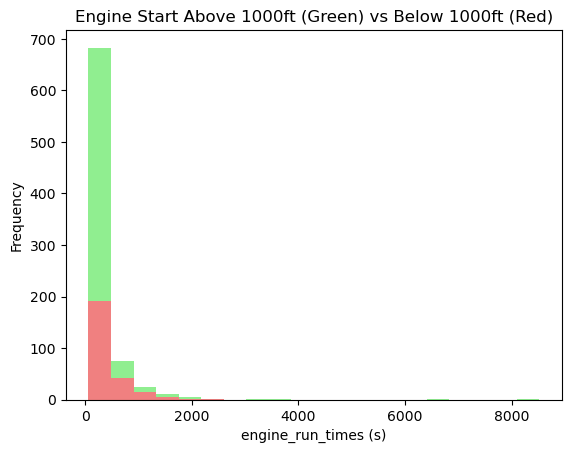

In [57]:
plt.hist([group1['engine_run_times (s)'],group2['engine_run_times (s)']],
          bins=20, stacked=True, color = ['lightcoral','lightgreen'])

# Add title and labels
plt.title('Engine Start Above 1000ft (Green) vs Below 1000ft (Red)')
plt.xlabel('engine_run_times (s)')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

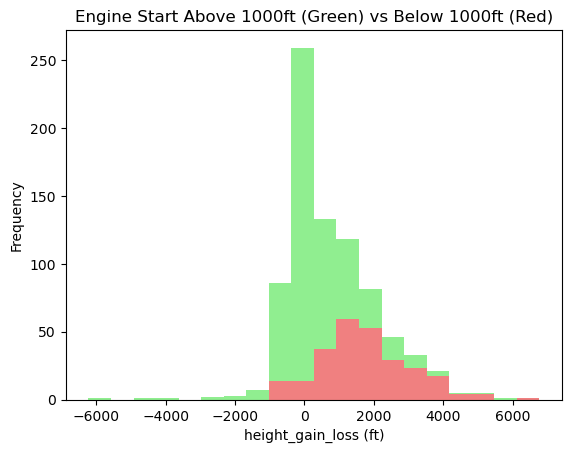

In [58]:
plt.hist([group1['height_gain_loss (ft)'],group2['height_gain_loss (ft)']],
          bins=20, stacked=True, color = ['lightcoral','lightgreen'])

# Add title and labels
plt.title('Engine Start Above 1000ft (Green) vs Below 1000ft (Red)')
plt.xlabel('height_gain_loss (ft)')
plt.ylabel('Frequency')


<Axes: >

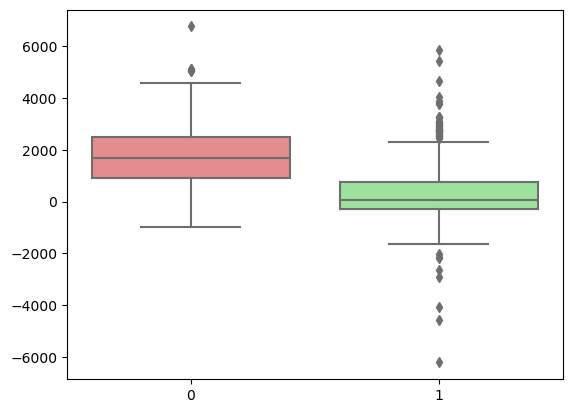

In [61]:
import seaborn as sns

sns.boxplot(data=[group1['height_gain_loss (ft)'], group2['height_gain_loss (ft)']], palette=['lightcoral','lightgreen'])

In [63]:
group1.head(5)

,Unnamed: 0,index,Date (MM/DD/YYYY),File,Gtype,Flight Time,Start Time,End Time,Landing,Start_Alt (ft MSL),Max Altitude (ft MSL/ft AGL),Surface Height (ft MSL),Pressure Altitude (ft MSL),Offset (ft),Sensor Info,ENL_Engine_Run_Start_Times,MOP_Engine_Run_Start_Times,RPM_Engine_Run_Start_Times,ENL_Engine_Run_Altitudes_MSL,MOP_Engine_Run_Altitudes_MSL,RPM_Engine_Run_Altitudes_MSL,ENL_Engine_Run_Altitudes_AGL,MOP_Engine_Run_Altitudes_AGL,RPM_Engine_Run_Altitudes_AGL,ENL_Noise_Registration_Times,MOP_Noise_Registration_Times,RPM_Noise_Registration_Times,ENL_Noise_Registration_Altitudes_AGL,MOP_Noise_Registration_Altitudes_AGL,RPM_Noise_Registration_Altitudes_AGL,first_event_time,event_type,event_sensor,first_event_datetime,flight_start_datetime,window_start,window_end,engine_run_agls,altitude_rate_pre_event_window (ft/s),distance_traveled_during_window (miles),is_circling_during_pre_event_window,terrain_elev_at_engine_run (ft),terrain_label_at_engine_run,Engine_Start_Above_1000ft,engine_run_times (s),height_gain_loss (ft),avg_speed_while_engine_running (knots),min_speed_while_engine_running (knots),max_speed_while_engine_running (knots),All_Min_TAS_knots,All_Max_TAS_knots,All_Avg_TAS_knots,All_Post_Run_Min_TAS_knots,All_Post_Run_Max_TAS_knots,All_Post_Run_Avg_TAS_knots,Circling_Segment_Found,Min_Speed_While_Engine_Running_knots,Max_Speed_While_Engine_Running_knots,Avg_Speed_While_Engine_Running_knots,max_noise_ENL,max_noise_MOP,max_noise_RPM,Engine_Run_Start_Times,time_difference,Engine_Event_LessThan_5min_into_flight,Height_Gain_Indicator,All_Gain_For_Flight_Ind,Height_Loss_Indicator,All_Loss_For_Flight_Ind,Blue_Line_Speed_Success_Ind
0,0,13,08/18/2020,2020-08-18-CNI-20Y-01.IGC,ASW 27-18 E (ASG-29E),3:37:01,16:44:59,202200,HOME,652,7208[5847],199,215,16,ASG29E.'s ENL monitor reports Engine Run 3 min...,165704.0,NaN,NaN,1410.0,NaN,NaN,656.0,NaN,NaN,165704.0,NaN,NaN,656.0,NaN,NaN,16:57:04,Engine_Run_Start,ENL,2020-08-18 16:57:04,1900-01-01 16:44:59,2020-08-18 16:52:04,2020-08-18 16:57:04,656.0,-0.936667,5.448886,False,772.646481,Closed Forest,False,180,1368,NaN,NaN,NaN,45.4,94.9,69.3,45.4,81.7,65.1,True,NaN,NaN,NaN,999.0,NaN,NaN,16:57:04,00:12:05,0,1,1,0,0,1
3,3,25,06/09/2018,2018-06-09-CNI-20E-01.IGC,ASW 27-18 E (ASG-29E),2:39:52,19:31:32,221124,HOME,1578,5885[4203],481,488,7,ASG29's ENL monitor reports Engine Run 2 minut...,202616.0,NaN,NaN,2444.0,NaN,NaN,830.0,NaN,NaN,195940.0,NaN,NaN,2024.0,NaN,NaN,20:26:16,Engine_Run_Start,ENL,2018-06-09 20:26:16,1900-01-01 19:31:32,2018-06-09 20:21:16,2018-06-09 20:26:16,830.0,-0.693333,4.463128,False,1574.449865,Open Forest,False,120,941,NaN,NaN,NaN,47.8,72.8,57.6,45.6,71.6,59.1,False,NaN,NaN,NaN,999.0,NaN,NaN,20:26:16,00:54:44,0,1,1,0,0,1
7,7,32,08/18/2018,2018-08-18-CNI-232-01.IGC,ASH 31 MI,5:14:00,18:03:40,231740,HOME,938,8805[8389],286,270,-16,ASH31mi18's ENL monitor reports Engine Run 11 ...,223420.0,NaN,NaN,1394.0,NaN,NaN,873.0,NaN,NaN,181508.0,NaN,NaN,2526.0,NaN,NaN,22:34:20,Engine_Run_Start,ENL,2018-08-18 22:34:20,1900-01-01 18:03:40,2018-08-18 22:29:20,2018-08-18 22:34:20,873.0,-0.820000,7.357226,False,510.199255,Shrubs,False,660,2684,NaN,NaN,NaN,56.9,80.4,66.4,51.0,78.8,63.5,True,NaN,NaN,NaN,999.0,NaN,NaN,22:34:20,04:30:40,0,1,1,0,0,1
8,8,43,03/14/2020,03EGIQO1.IGC,SZD-56-3 DIANA-2 FES,4:07:39,17:03:31,211110,HOME,144,5682[5603],44,-78,-122,Diana2's ENL monitor reports Engine Run 1 minu...,210805.0,NaN,NaN,731.0,NaN,NaN,577.0,NaN,NaN,170332.0,NaN,NaN,26.0,NaN,NaN,21:08:05,Engine_Run_Start,ENL,2020-03-14 21:08:05,1900-01-01 17:03:31,2020-03-14 21:03:05,2020-03-14 21:08:05,577.0,-0.893333,5.558330,False,156.536858,Closed Forest,False,60,122,NaN,NaN,NaN,47.1,61.6,52.5,46.2,80.0,67.2,True,NaN,NaN,NaN,999.0,NaN,NaN,21:08:05,04:04:34,0,1,1,0,0,1
12,12,59,05/26/2016,2016-05-26-CNI-21L-01.IGC,VENTUS 2CT,2:02:48,17:36:24,193912,HOME,803,7385[5925],245,214,-31,VENTUS2CT's ENL monitor reports Engine Run 2 m...,193124.0,NaN,NaN,1561.0,NaN,NaN,768.0,NaN,NaN,193124.0,NaN,NaN,768.0,NaN,NaN,19:31:24,E

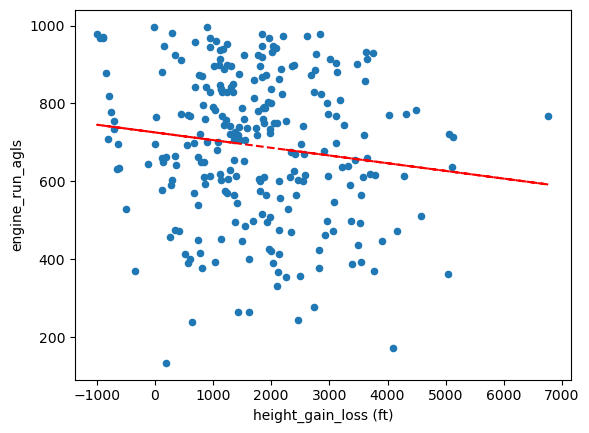

In [69]:
# Create scatter plot
group1.plot.scatter(x='height_gain_loss (ft)', y='engine_run_agls')

# Calculate the line of best fit (linear regression)
z = np.polyfit(group1['height_gain_loss (ft)'], group1['engine_run_agls'], 1) 
p = np.poly1d(z)

# Add the line of best fit to the plot
plt.plot(group1['height_gain_loss (ft)'], p(group1['height_gain_loss (ft)']), "r--")

plt.show()

In [68]:
from scipy.stats import spearmanr
spearmanr(group1['height_gain_loss (ft)'], group1['engine_run_agls'])

SignificanceResult(statistic=-0.12502680091503435, pvalue=0.04609287292553774)

/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


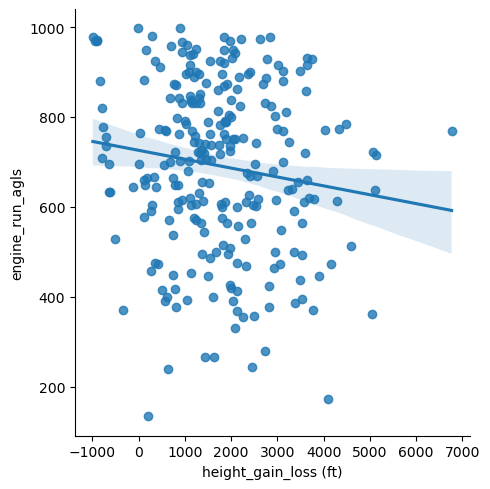

In [71]:
# plot 2 corresponding figure-level plot
g = sns.lmplot(data=group1, x='height_gain_loss (ft)', y='engine_run_agls')